### Steps

1. Download the training and validation data.  Note that this the uncompressed dataset in the introduction.
1. Install NiBabel, NumPy, Matplotlib, and PyTorch.
1. Install JupyterLab (recommended).
1. Open a pair of T1-w and T2-w images (the first six characters of the filename identifies a unique subject).
1. Plot a slice of the 3D image volume to the screen from both images and verify that the anatomy approximately aligns.

#### Downlaod the training and test data

In [1]:
import os
from os import path
from urllib import request

os.makedirs('./data', exist_ok=True)

ZIP_FILE = 'small_data.zip'
DATA_URL = 'https://liveproject-resources.s3.amazonaws.com/103/resources/small_data.zip'
if not path.exists(f'./data/{ZIP_FILE}'):
    request.urlretrieve(DATA_URL, f'data/{ZIP_FILE}')


In [2]:
from zipfile import ZipFile

#unpack the data 
if not path.exists(f'./data/small'):
    with ZipFile(f'./data/{ZIP_FILE}', 'r') as zipObj:
        zipObj.extractall('./data')


In [3]:
T1_PATH = './data/small/t1/'
T2_PATH = './data/small/t2/'

In [4]:
#picking a test subject to graph
SUBJ = 'IXI102-HH-1416'

#### Load a single tensor for T1

In [19]:
import nibabel as nib

def load_mr_image(subj, ttype):
    suff = ttype.upper()
    if ttype == 't2': 
        suff = f'{suff}_reg'
    return nib.load(f'./data/small/{ttype}/{subj}-{suff}_fcm.nii.gz')

In [20]:
image = load_mr_image(SUBJ, 't1')
image_data = image.get_fdata()


In [21]:
type(image_data)

numpy.ndarray

In [22]:
image_data.shape

(120, 120, 90)

#### Plot your T1 Tensor

##### Resources:

* https://lisaong.github.io/mldds-courseware/01_GettingStarted/numpy-tensor-slicing.slides.html
* https://nbviewer.jupyter.org/gist/jcreinhold/78943cdeca1c5fca4a5af5d066bd8a8d

In [23]:
#pick a slice
sn = 45
img_slice_data = image_data[:, :, sn]
img_slice_data.shape

(120, 120)

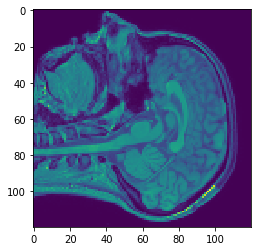

In [24]:
#plot your slice
import matplotlib.pyplot as plt
%matplotlib inline  


#plt.axis('off')
plt.imshow(img_slice_data)

#### Plot T2 Tensor

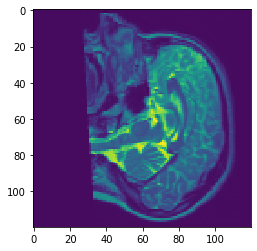

In [26]:
imag2 = load_mr_image(SUBJ, 't2')
image_data = imag2.get_fdata()
img_slic2 = image_data[:, :, sn]

plt.imshow(img_slic2)